In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
● Понижение коэффициента surge, чтобы увеличить price-to-order конверсию (во время surge)
Ожидаем: выше price-to-order конверсия во время surge

In [2]:
ds = pd.read_csv('post_abtest_data.csv')

In [3]:
ds['price-to-order'] = ds['order_made'] / ds['price_seen']

ds = ds.query('surge == "surge"')

ds

,user_id,date,app_opened,group,price_seen,order_made,surge,os,user_cancelled,city_center_order,groups,price-to-order
1,867689,2020-05-29,1,Control,1,0,surge,iOS,NaN,NaN,Control,0.0
2,867689,2020-05-25,1,Control,1,1,surge,Android,0.0,0.0,Control,1.0
3,752172,2020-05-29,1,Control,1,1,surge,Android,0.0,1.0,Control,1.0
5,486559,2020-05-25,1,Control,1,0,surge,Android,NaN,NaN,Control,0.0
8,486559,2020-05-28,1,Control,1,0,surge,iOS,NaN,NaN,Control,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101484,380230,2020-05-26,1,Control,1,1,surge,Android,0.0,1.0,Control,1.0
101486,946650,2020-05-26,1,Test,1,1,surge,Android,0.0,0.0,Test,1.0
101492,811157,2020-05-26,1,Control,1,0,surge,iOS,NaN,NaN,Control,0.0
101493,442716,2020-05-26,1,Test,1,1,surge,Android,0.0,1.0,Test,1.0


In [4]:
f'По датам выборка делится на {ds.date.nunique()} групп'

'По датам выборка делится на 7 групп'

In [ ]:
ttest_ind()

In [20]:
p_vals = []

for date_i in ds.date.unique():
    print(date_i)
    ds_d = ds.query(f'date == "{date_i}"')
    ds_d_1 = ds_d.query('group == "Control"')['price-to-order']
    ds_d_2 = ds_d.query('group == "Test"')['price-to-order']                 
    p_vals.append([date_i, ttest_ind( ds_d_1, ds_d_2 ).pvalue])

p_vals

2020-05-29
2020-05-25
2020-05-28
2020-05-31
2020-05-30
2020-05-27
2020-05-26


[['2020-05-29', 0.5501248402960568],
 ['2020-05-25', 0.0019069871098142616],
 ['2020-05-28', 0.18878068676535126],
 ['2020-05-31', 0.5862162039800894],
 ['2020-05-30', 0.056713683945567285],
 ['2020-05-27', 0.11421678937745455],
 ['2020-05-26', 0.4698971874466067]]

In [32]:
result = pd.DataFrame(p_vals).rename(
    columns={0:'date', 1:'p_value'}
).sort_values(
    by='date'
).set_index(
    'date'
)

result['5_line'] = 0.05
result['25_line'] = 0.25
result['33_line'] = 0.33

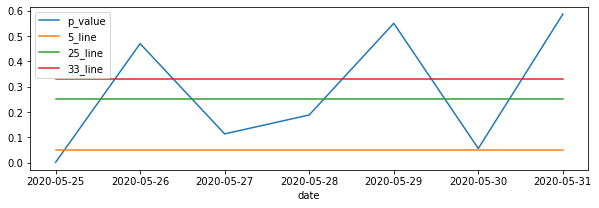

In [34]:
result.plot(figsize=(10,3));

# p-значение слишком высокое для 5%й вероятности ошибки - т.е. гипотезу о статистической значимости отвергаем.